In [1]:
### import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
#matplotlib.rcParams.update({"font size":15})
#plt.style.use("dark_background")

In [2]:
df=pd.read_csv("predictive_maintenance.csv")

In [3]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
5         6     M14865    M                298.1                    308.6   
6         7     L47186    L                298.1                    308.6   
7         8     L47187    L                298.1                    308.6   
8         9     M14868    M                298.3                    308.7   
9        10     M14869    M                298.5                    309.0   
10       11     H29424    H                298.4                    308.9   
11       12     H29425    H                298.6                    309.1   
12       13     M14872    M                298.6                    309.1   
13       14     M14873    M                298.6                    309.2   
14       15     L47194    L                298.6                    309.2   
15       16     L47195    L                298.6                    309.2   
16       17     M14876    M                298.6                    309.2   
17       18     M14877    M                298.7                    309.2   
18       19     H29432    H                298.8                    309.2   
19       20     M14879    M                298.9                    309.3   
20       21     H29434    H                298.9                    309.3   
21       22     L47201    L                298.8                    309.3   
22       23     M14882    M                298.9                    309.3   
23       24     L47203    L                299.0                    309.4   
24       25     M14884    M                299.0                    309.4   
25       26     L47205    L                299.0                    309.5   
26       27     L47206    L                299.1                    309.5   
27       28     H29441    H                299.1                    309.4   
28       29     L47208    L                299.1                    309.4   
29       30     L47209    L                299.0                    309.4   
30       31     M14890    M                299.1                    309.5   
31       32     L47211    L                299.0                    309.4   
32       33     L47212    L                299.0                    309.4   
33       34     L47213    L                298.9                    309.3   
34       35     M14894    M                298.8                    309.1   
35       36     M14895    M                298.8                    309.2   
36       37     M14896    M                298.9                    309.2   
37       38     L47217    L                298.8                    309.1   
38       39     H29452    H                298.9                    309.2   
39       40     L47219    L                298.8                    309.1   
40       41     L47220    L                298.8                    309.1   
41       42     L47221    L                298.8                    309.1   
42       43     M14902    M                298.8                    309.1   
43       44     H29457    H                298.8                    309.2   
44       45     M14904    M                298.8                    309.1   
45       46     L47225    L                298.8                    309.1   
46       47     M14906    M                298.7                    309.0   
47       48     L47227    L                298.8                    309.1   
48       49     H29462    H                298.8                    309.2   
49       50     M14909    M                298.9                    309.2   
50       51     L47230    L                298.9                    309.1   
51  

In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
df.drop(["UDI","Product ID"],axis=1, inplace=True)

In [8]:
#df["Air temperature [K]"]=df["Air temperature [K]"]-273

In [9]:
df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000        53.000000      0.000000  
50%       40.100000       108.000000      0.000000  
75%       46.800000       162.000000      0.000000  
max       76.600000       253.000000      1.000000

<Axes: xlabel='Target', ylabel='count'>

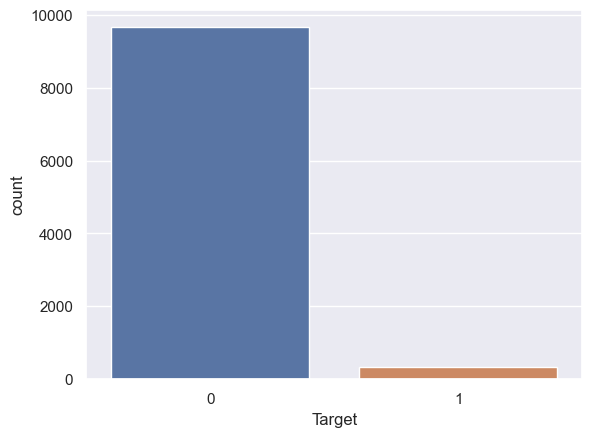

In [10]:
sns.countplot(x="Target",data=df)

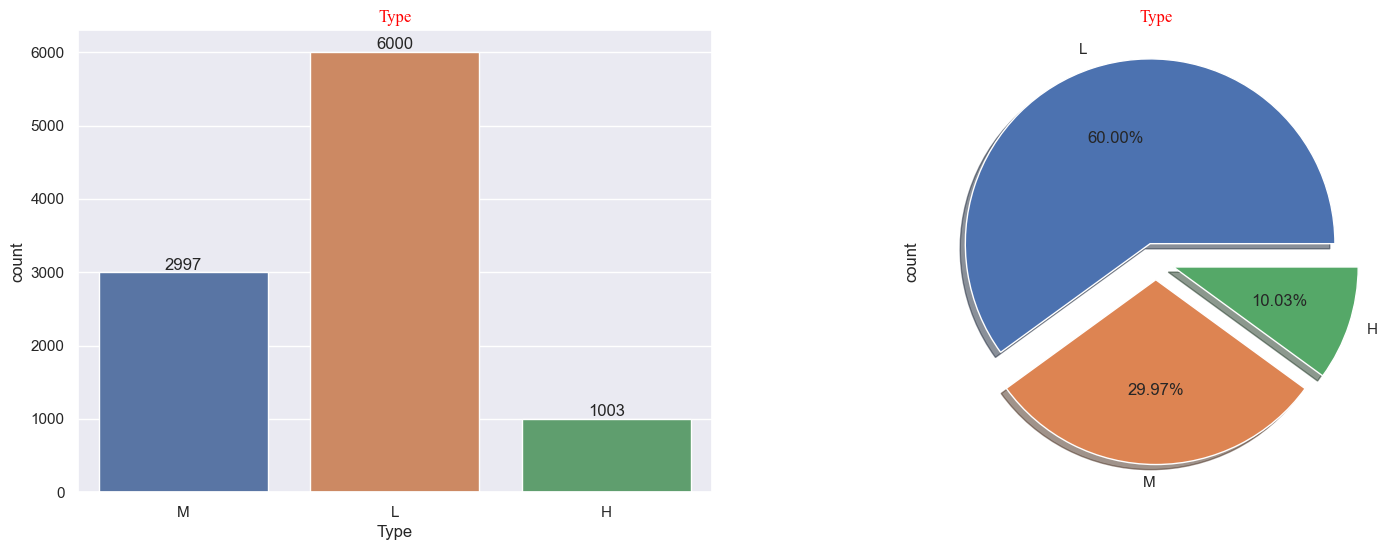

In [11]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

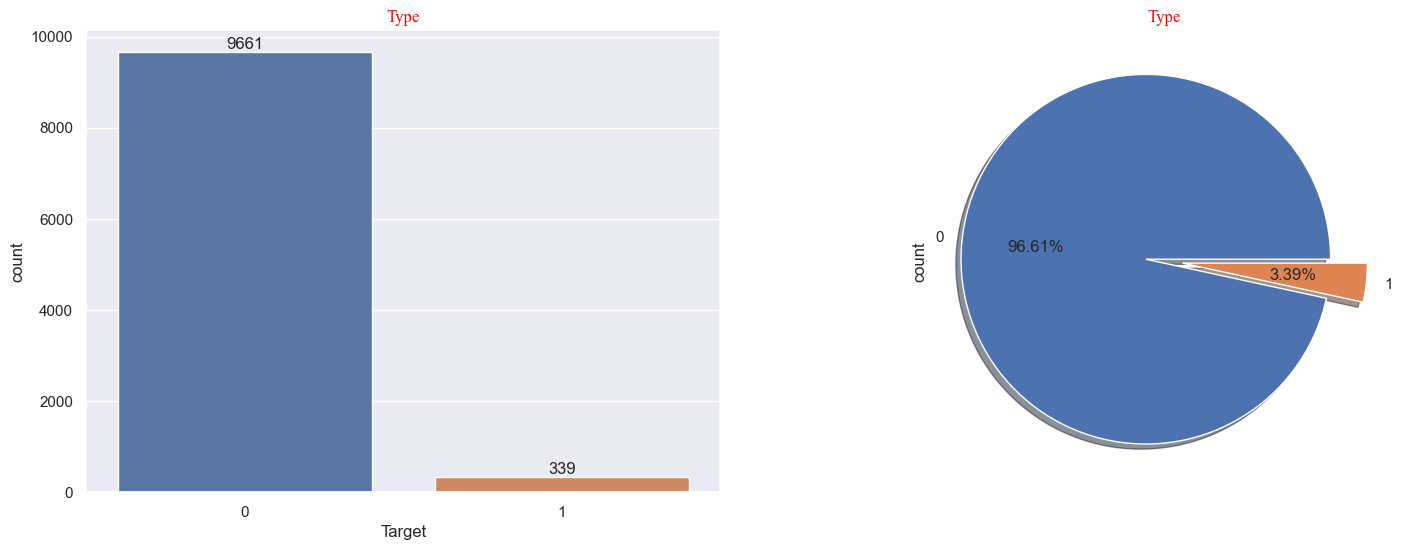

In [12]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

In [13]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(5)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     2                298.2                    308.7                    1408   
2     2                298.1                    308.5                    1498   
3     2                298.2                    308.6                    1433   
4     2                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0         42.8                0       0             1  
1         46.3                3       0             1  
2         49.4                5       0             1  
3         39.5                7       0             1  
4         40.0                9       0             1

In [14]:
x=df.drop(["Failure Type"],axis=1)

In [15]:
y=df["Failure Type"].values

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
reg=LogisticRegression()

In [19]:
reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
reg.score(x_test,y_test)

0.9693333333333334

In [21]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [22]:
classifier.score(x_test,y_test)

0.992

In [23]:
from sklearn.svm import SVC

In [24]:
svc=SVC()
svc.fit(x_train, y_train) 
svc.score(x_test,y_test)

0.9683333333333334

In [25]:
svc.score(x_test,y_test)

0.9683333333333334

In [26]:
# Hyperparameter tuning

In [27]:
#kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [28]:
svc1=SVC(
    C=1.0,
    kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [29]:
svc1.fit(x_train, y_train) 
svc1.score(x_test,y_test)

0.9966666666666667

In [30]:
svc2=SVC(
    C=1.0,
    kernel='poly',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [31]:
svc2.fit(x_train, y_train) 
svc2.score(x_test,y_test)

0.9676666666666667

In [32]:
svc3=SVC(
    C=1.0,
    kernel='sigmoid',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [33]:
svc3.fit(x_train, y_train) 
svc3.score(x_test,y_test)

0.963